In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
Age = np.array([31, 32, 33, 35, 36, 38, 45, 48, 49, 52, 54, 58])
Insurance = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
df = pd.DataFrame(Age.reshape(-1, 1))
df["Target"] = Insurance

In [4]:
df

,0,Target
0,31,0
1,32,0
2,33,0
3,35,0
4,36,0
5,38,0
6,45,1
7,48,1
8,49,1
9,52,1


In [5]:
df.columns = ["Age", "Target"]

In [6]:
df

,Age,Target
0,31,0
1,32,0
2,33,0
3,35,0
4,36,0
5,38,0
6,45,1
7,48,1
8,49,1
9,52,1


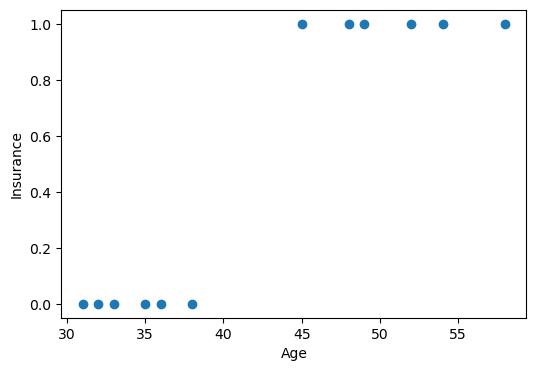

In [7]:
plt.figure(figsize=(6,4))
plt.xlabel("Age")
plt.ylabel("Insurance")
plt.scatter(df["Age"], df["Target"])
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression()

In [10]:
X = df.drop("Target", axis=1)
y = df["Target"]

In [11]:
X.head()

,Age
0,31
1,32
2,33
3,35
4,36


In [12]:
y

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    1
Name: Target, dtype: int32

In [13]:
model.fit(X, y)

LogisticRegression()

In [14]:
model.predict([[34]])

array([0])

In [15]:
model.predict([[56]])

array([1])

In [16]:
model.predict([[52]])

array([1])

In [17]:
model.predict_proba([[34]])

array([[0.99649126, 0.00350874]])

In [18]:
model.predict_proba([[56]])

array([[2.36415432e-05, 9.99976358e-01]])

In [19]:
model.predict_proba([[52]])

array([[4.57818992e-04, 9.99542181e-01]])

In [20]:
model.predict_proba([[43]])

array([[0.26506682, 0.73493318]])

In [21]:
np.argmax(model.predict_proba([[56]]))

1

In [22]:
np.argmax(model.predict_proba([[34]]))

0

In [23]:
m = model.coef_
m

array([[0.74097568]])

In [24]:
c = model.intercept_
c

array([-30.84215642])

In [25]:
proba = 1 / (1 + (np.exp(-(m*(np.arange(30, 60))+c))))
proba

array([[1.81715576e-04, 3.81159861e-04, 7.99331798e-04, 1.67551278e-03,
        3.50873980e-03, 7.33302038e-03, 1.52616613e-02, 3.14909874e-02,
        6.38594696e-02, 1.25197567e-01, 2.30918987e-01, 3.86475032e-01,
        5.69257393e-01, 7.34933184e-01, 8.53306488e-01, 9.24264341e-01,
        9.62410803e-01, 9.81723621e-01, 9.91204460e-01, 9.95788230e-01,
        9.97988031e-01, 9.99039987e-01, 9.99542181e-01, 9.99781729e-01,
        9.99895949e-01, 9.99950402e-01, 9.99976358e-01, 9.99988731e-01,
        9.99994629e-01, 9.99997440e-01]])

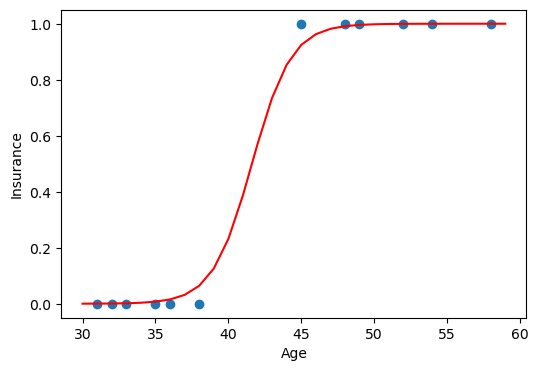

In [26]:
plt.figure(figsize=(6,4))
plt.xlabel("Age")
plt.ylabel("Insurance")
plt.scatter(df["Age"], df["Target"])
plt.plot(np.arange(30,60), proba.reshape(-1,1), color= "red")
plt.show()

In [27]:
from sklearn.datasets import load_digits

In [28]:
digit = load_digits()

In [29]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [30]:
digit.data.shape

(1797, 64)

In [31]:
digit.data[54]

array([ 0.,  0.,  0.,  1., 14., 14.,  3.,  0.,  0.,  0.,  0., 10., 11.,
       13.,  8.,  0.,  0.,  0.,  0.,  7.,  0., 13.,  8.,  0.,  0.,  0.,
        0.,  0.,  7., 15.,  1.,  0.,  0.,  4.,  8., 12., 15.,  4.,  0.,
        0.,  0.,  6., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 12.,
       12.,  4.,  2.,  0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.])

In [32]:
digit.data[54].reshape(8,8)

array([[ 0.,  0.,  0.,  1., 14., 14.,  3.,  0.],
       [ 0.,  0.,  0., 10., 11., 13.,  8.,  0.],
       [ 0.,  0.,  0.,  7.,  0., 13.,  8.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 15.,  1.,  0.],
       [ 0.,  4.,  8., 12., 15.,  4.,  0.,  0.],
       [ 0.,  6., 16., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 12., 12.,  4.,  2.,  0.],
       [ 0.,  0.,  0.,  1., 13., 16.,  5.,  0.]])

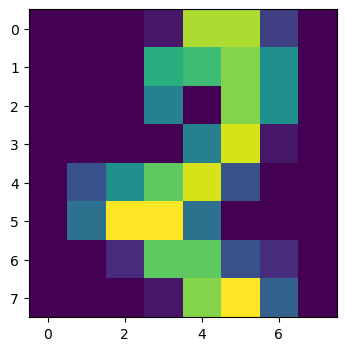

In [33]:
plt.figure(figsize=(4,4))
plt.imshow(digit.data[54].reshape(8,8))
plt.show()

In [69]:
print(digit.data[54].reshape(8,8))

[[ 0.  0.  0.  1. 14. 14.  3.  0.]
 [ 0.  0.  0. 10. 11. 13.  8.  0.]
 [ 0.  0.  0.  7.  0. 13.  8.  0.]
 [ 0.  0.  0.  0.  7. 15.  1.  0.]
 [ 0.  4.  8. 12. 15.  4.  0.  0.]
 [ 0.  6. 16. 16.  6.  0.  0.  0.]
 [ 0.  0.  2. 12. 12.  4.  2.  0.]
 [ 0.  0.  0.  1. 13. 16.  5.  0.]]


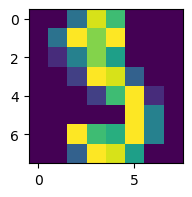

In [34]:
plt.figure(figsize=(2,2))
plt.imshow(digit.data[475].reshape(8,8))
plt.show()

Below number is 8


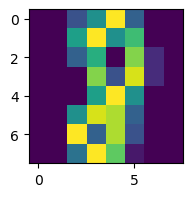

Below number is 7


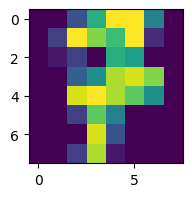

Below number is 2


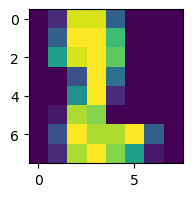

Below number is 4


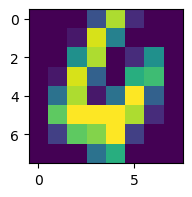

Below number is 1


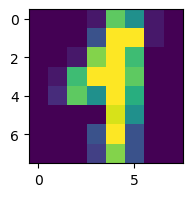

In [35]:
ls = [53, 653, 243, 1355, 90]
for i in ls:
    plt.figure(figsize=(2,2))
    print(f"Below number is {digit.target[i]}")
    plt.imshow(digit.data[i].reshape(8,8))
    plt.show()

In [36]:
import seaborn as sns

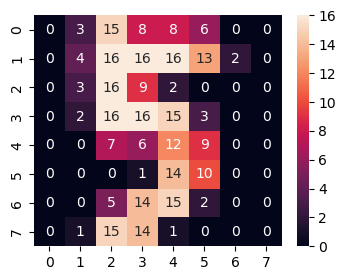

In [63]:
plt.figure(figsize=(4,3))
sns.heatmap(digit.data[35].reshape(8,8), annot=True)
plt.show()

In [38]:
digit.target[35]

5

In [39]:
digit_df = pd.DataFrame(digit.data, columns = digit.feature_names)
digit_df["Target"] = digit.target

In [40]:
digit_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [41]:
digit_df["Target"].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: Target, dtype: int64

In [42]:
digit.data[35]

array([ 0.,  3., 15.,  8.,  8.,  6.,  0.,  0.,  0.,  4., 16., 16., 16.,
       13.,  2.,  0.,  0.,  3., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  2.,
       16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  7.,  6., 12.,  9.,  0.,
        0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  5., 14.,
       15.,  2.,  0.,  0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.])

In [43]:
digit.target[35]

5

In [44]:
digit_df.iloc[35]

pixel_0_0     0.0
pixel_0_1     3.0
pixel_0_2    15.0
pixel_0_3     8.0
pixel_0_4     8.0
             ... 
pixel_7_4     1.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Target        5.0
Name: 35, Length: 65, dtype: float64

In [45]:
X = digit.data
y = digit.target

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=34)

In [48]:
log_reg = LogisticRegression()

In [49]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [50]:
log_reg.predict([digit.data[35]])

array([5])

In [51]:
log_reg.predict_proba([digit.data[35]])

array([[1.85501936e-12, 5.96605782e-11, 4.66311123e-17, 1.60653666e-10,
        4.29869694e-11, 9.99999999e-01, 3.40912903e-17, 8.26341248e-10,
        1.44206421e-13, 3.58482071e-11]])

In [ ]:
np.argmax([[1.85501936e-12, 5.96605782e-11, 4.66311123e-17, 1.60653666e-10,
        4.29869694e-11, 9.99999999e-01, 3.40912903e-17, 8.26341248e-10,
        1.44206421e-13, 3.58482071e-11]])

In [53]:
y_pred = log_reg.predict(X_test)

In [54]:
log_reg.score(X_train, y_train)

1.0

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
accuracy_score(y_test, y_pred)

0.9644444444444444

In [57]:
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  1,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 48,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 43,  1,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  2,  0,  0,  1,  0,  1,  0, 47,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0, 36]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        46
           3       1.00      0.94      0.97        54
           4       0.96      0.96      0.96        50
           5       0.98      0.91      0.95        47
           6       0.95      0.97      0.96        40
           7       1.00      1.00      1.00        30
           8       0.96      0.92      0.94        51
           9       0.88      0.95      0.91        38

    accuracy                           0.96       450
   macro avg       0.96      0.97      0.96       450
weighted avg       0.97      0.96      0.96       450



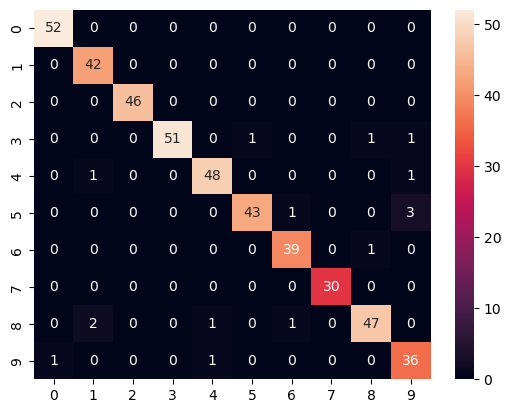

In [59]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        46
           3       1.00      0.94      0.97        54
           4       0.96      0.96      0.96        50
           5       0.98      0.91      0.95        47
           6       0.95      0.97      0.96        40
           7       1.00      1.00      1.00        30
           8       0.96      0.92      0.94        51
           9       0.88      0.95      0.91        38

    accuracy                           0.96       450
   macro avg       0.96      0.97      0.96       450
weighted avg       0.97      0.96      0.96       450

